In [47]:
import networkx as nx
from shapely.geometry import Polygon, Point
import matplotlib.pyplot as plt


class occupancy_estimator():
    def __init__(self):
        pass
    
    def init_data(self, data_obj):
        self.data = data_obj

    def find_centroids(self):

        centroid=[]
        for i in range(len(self.data)):
            vertex = self.data.iloc[i,:]["geom"]["coordinates"][0]
            polygon1=Polygon(vertex)
            centroid.append(polygon1.centroid)
        self.centroid=centroid
        print("# centroids:",len(centroid))
        print("# polygons:",len(self.data))
        return centroid

    def create_graph(self,show_graph=True,add_outside_node=True):
        self.graph=nx.Graph()
        for i in range(len(self.centroid)):
            self.graph.add_node(i,pos=(self.centroid[i].x,self.centroid[i].y))
        
        # adds a node representing outside
        if add_outside_node==True:
            self.graph.add_node(len(G),pos=(-73.57,45.53))
        
        if show_graph==True:
            self.visualize_graph()
        
    def visualize_graph(self):
        pos=nx.get_node_attributes(self.graph,'pos')

        xs,ys=[],[]
        for i in range(len(pos)):
            xs.append(pos[i][0])
            ys.append(pos[i][1])
        
        n=list(self.graph.nodes)
        fig, ax = plt.subplots()
        ax.scatter(xs, ys)
        plt.grid()

        for i, txt in enumerate(n):
            ax.annotate(txt, (xs[i], ys[i]))
        plt.show()

In [1]:
from pycitylayers.client import Client
from pycitylayers.utils import PointGQL, PolygonGQL


In [4]:
client = Client().create(source='cerc')
coll = client.collection
tb=coll[6][0]
print(tb)
query_geometry = PointGQL().point(-73.570552324815,45.530402345761175)
print( query_geometry )

query_options = {
    # 'columns': ['index', 'built_area', 'geom', 'year_built'], 
    'nrows': 10000, 
    'skiprows': 0,
    'geometry_operation': 'distance_from_point',
    'geom_distance': 0.0005,
    'geometry': query_geometry,
    'crs_epsg': 4326,
}

data_lots = tb.query_simple( **query_options )
data_lots.head()

Fetching Metadata. Please Wait ...
---------- Table:0 ----------
Name:		building_lots 
Description:	 
Format:		CSV 

{'geometry': {'type': 'Point', 'coordinates': [-73.570552324815, 45.530402345761175], 'crs': {'type': 'name', 'properties': {'name': 'EPSG:4326'}}}}


,borough_id,building_number,built_area,dwelling_number,firstletter_apt,geom,index,land_area,landuse_code,landuse_text,lastletter_apt,max_floors,municipality_code,nad83_registration,street_name,street_number,uid,unit_category,unit_number,year_built
0,REM21,4218,454,1,0,"{'type': 'Polygon', 'crs': {'type': 'name', 'p...",4602,52,1000,Logement,0,1,50,9943-34-1120-6-001-0004,avenue Papineau (MTL),4218,5011916,Condominium,0,1910
1,REM21,4235,219,3,0,"{'type': 'Polygon', 'crs': {'type': 'name', 'p...",21512,284,1000,Logement,0,2,50,9943-23-5995-0-000-0000,rue Marquette (MTL),4235,1030537,Régulier,0,1885
2,REM21,4220,362,5,0,"{'type': 'Polygon', 'crs': {'type': 'name', 'p...",22960,239,1000,Logement,0,3,50,9943-23-5535-4-000-0000,rue Marquette (MTL),4224,1030019,Régulier,0,1926
3,REM21,1699,1255,16,0,"{'type': 'Polygon', 'crs': {'type': 'name', 'p...",23674,644,1000,Logement,0,3,50,9943-34-3605-4-000-0000,rue Rachel Est (MTL),1699,1033787,Régulier,0,1927
4,REM21,1651,466,2,0,"{'type': 'Polygon', 'crs': {'type': 'name', 'p...",23781,259,1000,Logement,0,3,50,9943-33-0449-2-000-0000,rue Rachel Est (MTL),1653,1033777,Régulier,0,1915


# centroids: 24
# polygons: 24


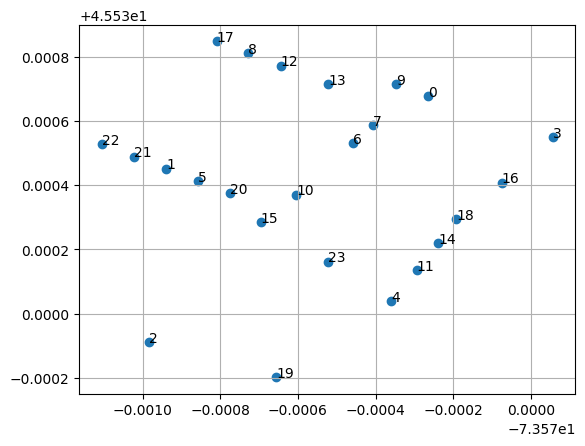

In [49]:
Occ=occupancy_estimator()
Occ.init_data(data_lots)
Occ.find_centroids()
Occ.create_graph(add_outside_node=False)


# centroids: 24
# polygons: 24


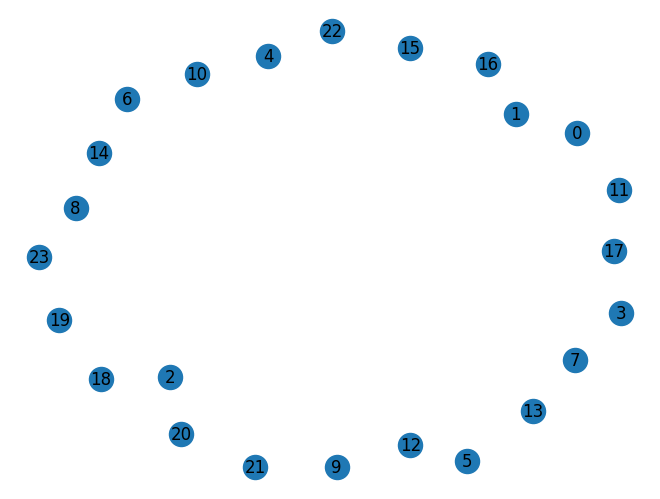

In [20]:
G=occupancy_estimator().create_graph(occupancy_estimator().find_centroids(data_lots))

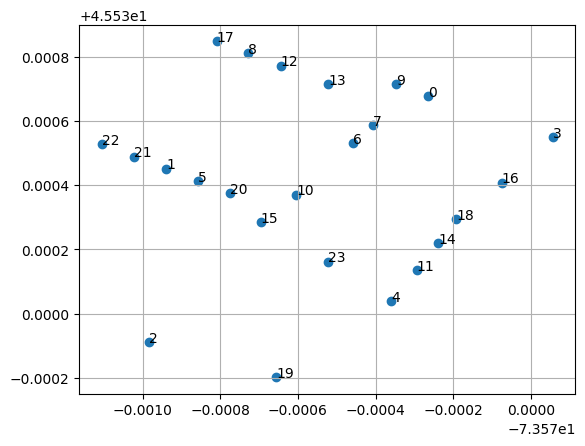

In [24]:
occupancy_estimator().visualize_graph(G)